In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rubin_sim.maf as maf

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/runComparison/runComparison.py:22: UserWarning: 
The generateDiffHtml method requires bokeh to be installed
but it is not needed to use the other methods in this class.
Run: pip install bokeh then restart your jupyter notebook kernel.
  warnings.warn('\n'+'The generateDiffHtml method requires bokeh to be installed'+'\n'+


In [3]:
opsim = 'baseline_nexp2_v1.7.1_10yrs'
opsdb = maf.db.OpsimDatabase('/Users/lynnej/opsim/fbs_1.7.1/new_rolling/baseline_nexp2_v1.7.1_10yrs.db')

In [4]:
slicer = maf.mafContrib.generateKNPopSlicer()

In [5]:
metric = maf.mafContrib.KNePopMetric()
summaryMetrics = [maf.SumMetric(), maf.MedianMetric(), maf.MeanMetric(), maf.MaxMetric()]

In [6]:
bundle = maf.MetricBundle(metric, slicer, None, runName=opsim, summaryMetrics=summaryMetrics)

In [7]:
outDir = 'test_kne'
bdict = {'kne': bundle}
g = maf.MetricBundleGroup(bdict, opsdb, outDir)

In [8]:
g.runAll()

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'fiveSigmaDepth', 'fieldRA', 'filter', 'night', 'fieldDec'].
Found 2044984 visits
Running:  ['kne']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [9]:
bdict.keys()

dict_keys(['kne', 'KNePopMetric__blue_color_detect', 'KNePopMetric__multi_color_detect', 'KNePopMetric__multi_detect', 'KNePopMetric__red_color_detect', 'KNePopMetric__ztfrest_simple', 'KNePopMetric__ztfrest_simple_red'])

In [10]:
plotFunc = maf.plots.HealpixSkyMap()

/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej/anaconda3/envs/rubin/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/lynnej

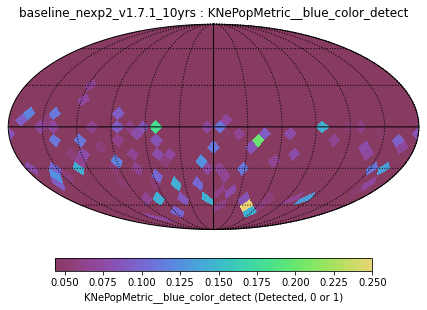

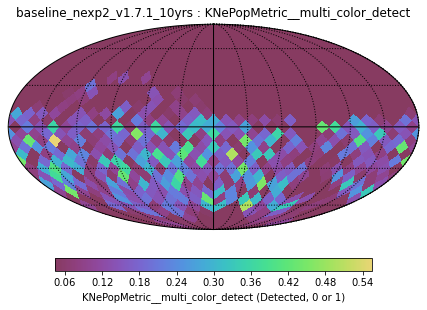

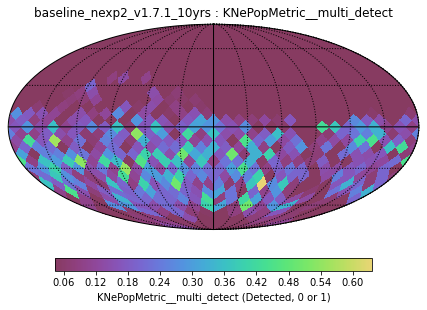

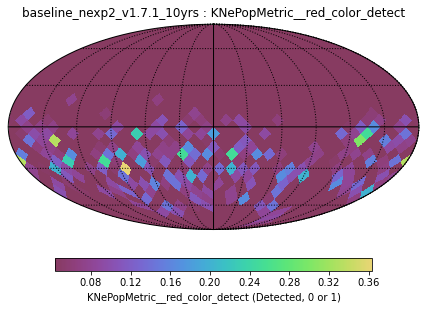

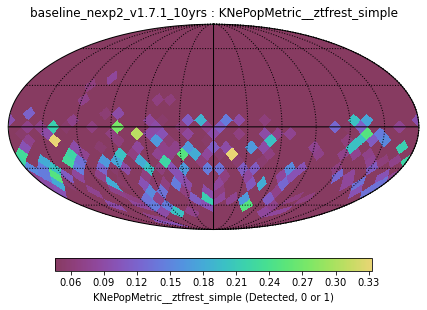

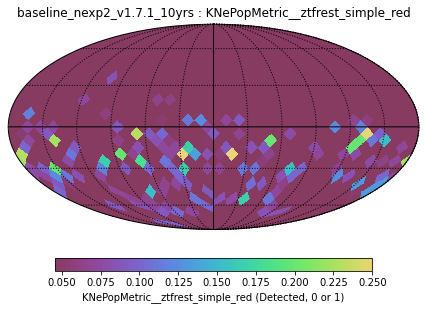

In [11]:
ph = maf.plots.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)
for k in bdict:
    if k.startswith('KN'):
        ph.setMetricBundles([bdict[k]])
        ph.plot(plotFunc=plotFunc)

In [12]:
for k in bdict:
    print(k, bdict[k].summaryValues)

kne {}
KNePopMetric__blue_color_detect {'Sum': 102.0, 'Median': 0.0, 'Mean': 0.015180830480726298, 'Max': 1.0}
KNePopMetric__multi_color_detect {'Sum': 878.0, 'Median': 0.0, 'Mean': 0.1306742074713499, 'Max': 1.0}
KNePopMetric__multi_detect {'Sum': 1053.0, 'Median': 0.0, 'Mean': 0.1567197499627921, 'Max': 1.0}
KNePopMetric__red_color_detect {'Sum': 284.0, 'Median': 0.0, 'Mean': 0.042268194671826166, 'Max': 1.0}
KNePopMetric__ztfrest_simple {'Sum': 290.0, 'Median': 0.0, 'Mean': 0.04316118470010418, 'Max': 1.0}
KNePopMetric__ztfrest_simple_red {'Sum': 191.0, 'Median': 0.0, 'Mean': 0.028426849233516894, 'Max': 1.0}


In [20]:
pd.DataFrame([bdict[k].summaryValues for k in bdict.keys() if k.startswith('KN')], 
             index=[k.replace('_', ' ') for k in bdict if k.startswith('KN')])

,Sum,Median,Mean,Max
KNePopMetric blue color detect,102.0,0.0,0.015181,1.0
KNePopMetric multi color detect,878.0,0.0,0.130674,1.0
KNePopMetric multi detect,1053.0,0.0,0.156720,1.0
KNePopMetric red color detect,284.0,0.0,0.042268,1.0
KNePopMetric ztfrest simple,290.0,0.0,0.043161,1.0
KNePopMetric ztfrest simple red,191.0,0.0,0.028427,1.0
